# 08 - Séries Temporais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Revisão Séries Temporais
- Series Estacionarias e Não Estacionárias
- Transformações de Séries
- Teste de Dickey Fuller

<img src="https://miro.medium.com/max/364/1*46jxiV9PiL5omTI9FDoW3Q.png" width=600>

##   

## Séries Temporais

Para essa aula, vamos Começar a conhecer os conceitos de Séries Temporais!
<br><br>
__Séries temporais__ nada mais é do que um conjunto de dados que foram gravados __sequencialmente__ ao longo de um __período de tempo.__

In [ ]:
# Imports Defaults

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

In [ ]:
path = '/content/drive/MyDrive/AdaTech/Estatística I/covid_saopaulo.csv'

covid = pd.read_csv(path, encoding='Latin-1', sep=',')

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datahora      1363 non-null   object
 1   casos_novos   1363 non-null   int64 
 2   obitos_novos  1363 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.1+ KB


In [ ]:
# Vamos trabalhar com um corte de tempo para datas referentes ao ano de 2020:

covid['datahora'] = pd.to_datetime(covid['datahora'], yearfirst=True)
covid = covid.query("datahora <= '2020-12-31'")

In [ ]:
covid.dtypes

datahora        datetime64[ns]
casos_novos              int64
obitos_novos             int64
dtype: object

In [ ]:
covid

,datahora,casos_novos,obitos_novos
0,2020-02-25,0,0
1,2020-02-26,0,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,0,0
...,...,...,...
306,2020-12-27,2836,55
307,2020-12-28,1576,39
308,2020-12-29,12477,293
309,2020-12-30,11849,282


In [ ]:
# Coluna datahora para index:

covid.index = covid['datahora']

In [ ]:
covid = covid.drop('datahora', axis=1)
covid

,casos_novos,obitos_novos
datahora,,
2020-02-25,0,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
...,...,...
2020-12-27,2836,55
2020-12-28,1576,39
2020-12-29,12477,293


In [ ]:
# Renomeia-se os nomes das colunas:

covid = covid.rename({'casos_novos': 'confirmed', 'obitos_novos': 'deaths'}, axis=1)
covid

,confirmed,deaths
datahora,,
2020-02-25,0,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
...,...,...
2020-12-27,2836,55
2020-12-28,1576,39
2020-12-29,12477,293


Existem várias formas de trabalhar com DATAS

https://pandas.pydata.org/docs/user_guide/timeseries.html

In [ ]:
# Converte o index do dataframe em períodos diários:

covid.index = covid.index.to_period("D")

In [ ]:
covid

,confirmed,deaths
datahora,,
2020-02-25,0,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
...,...,...
2020-12-27,2836,55
2020-12-28,1576,39
2020-12-29,12477,293


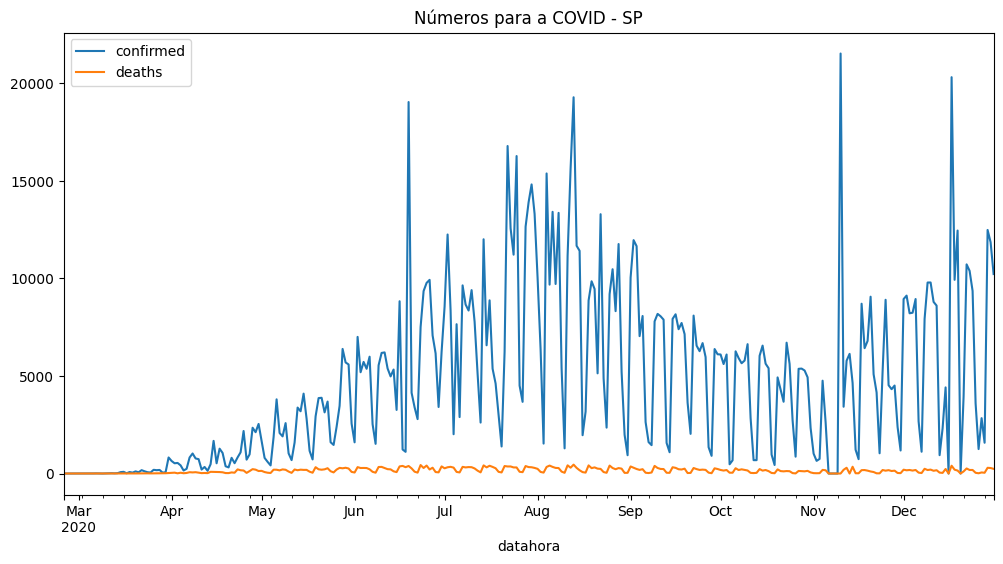

In [ ]:
# Plot da curva de confirmados e mortes por covid
covid.plot(figsize=(12, 6))

# Titulo do Gráfico
plt.title('Números para a COVID - SP')

# Mostra o gráfico

plt.show()

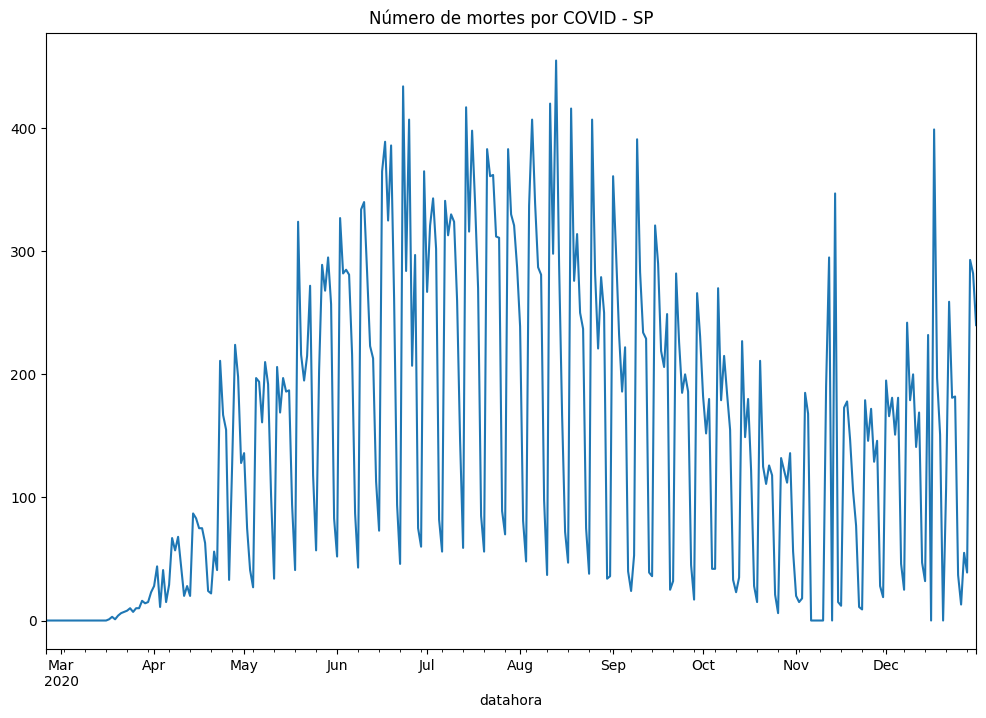

In [ ]:
# plot do gráfico

covid['deaths'].plot(figsize=(12, 8))

# Mostra o titulo
plt.title('Número de mortes por COVID - SP')

# Mostra o gráfico
plt.show()


##   

## Componentes da Série Temporal

Uma série temporal pode ser decomposta nos seguintes **componentes**:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças.
<br>
- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.
<br>
- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**.
<br>
- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.

Algumas ilustrações:

<img src="https://www.datavedas.com/wp-content/uploads/2018/04/3.1.3.1-Introduction-to-Time-Series-Data-R.jpg" width=600>

<img src="https://i2.wp.com/itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg?resize=661%2C599" width=600>


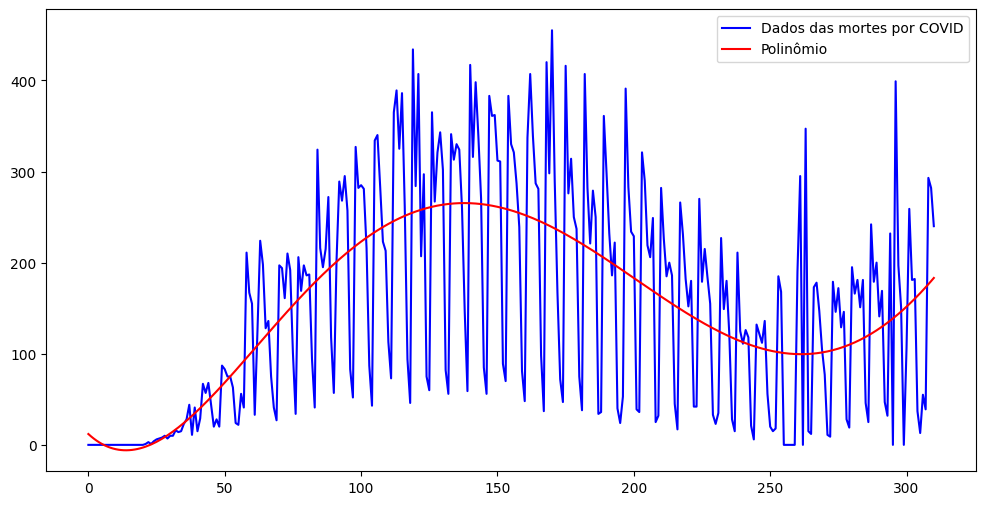

In [ ]:
# Aqui não trabalharemos com as datas mas sim com um índice inteiro das observações
x = np.array(range(len(covid.index)))

# Utilizando apenas os casos de morte por COVID
y = np.array(covid['deaths'])

# Define um polinomio de 5 ordem de acordo com x e y
polynomial = np.polyfit(x, y, 5)

# Gera a curva do polinomio
p5 = np.poly1d(polynomial)

# Cria os pontos continuos para o X
xx = np.linspace(x.min(), x.max(), len(y))

# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 6]

# Plot das Curvas
plt.plot(x, y, label='Dados das mortes por COVID', color='blue') # Plota os dados
plt.plot(xx, p5(xx), label='Polinômio', color='red') # Polinômio
plt.legend()

# Mostra o Gráfico
plt.show()

Já para a sazonalidade, pode-se classificar uma série temporal em **aditiva ou multiplicativa**:

- A **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo;
- A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**

<img src="https://miro.medium.com/max/564/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" width=600>

Vamos aos exemplos:

> **Exemplo**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png" width=600>

> **Exemplo**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png" width=600>


Para observarmos os componentes acima, podemos utilizar a biblioteca [statsmodels](https://www.statsmodels.org/stable/index.html), que é muito utilizada para a construção de modelos estatísticos.

A função `seasonal_decompose` proporciona a decomposição de séries temporais de forma simples e rápida!

In [ ]:
# Import da função da seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

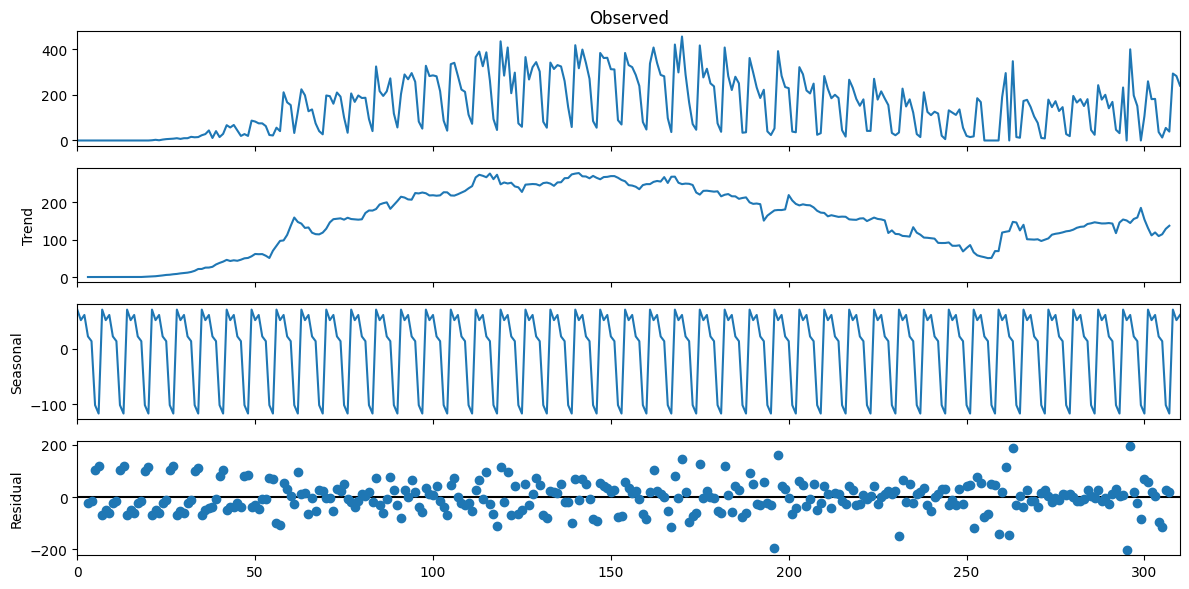

In [ ]:
mortes = np.array(y)

# Decomposição aditiva:

result_add = seasonal_decompose(mortes, model='additive', period=7)

# Plot da decomposição

result_add.plot()
plt.show()

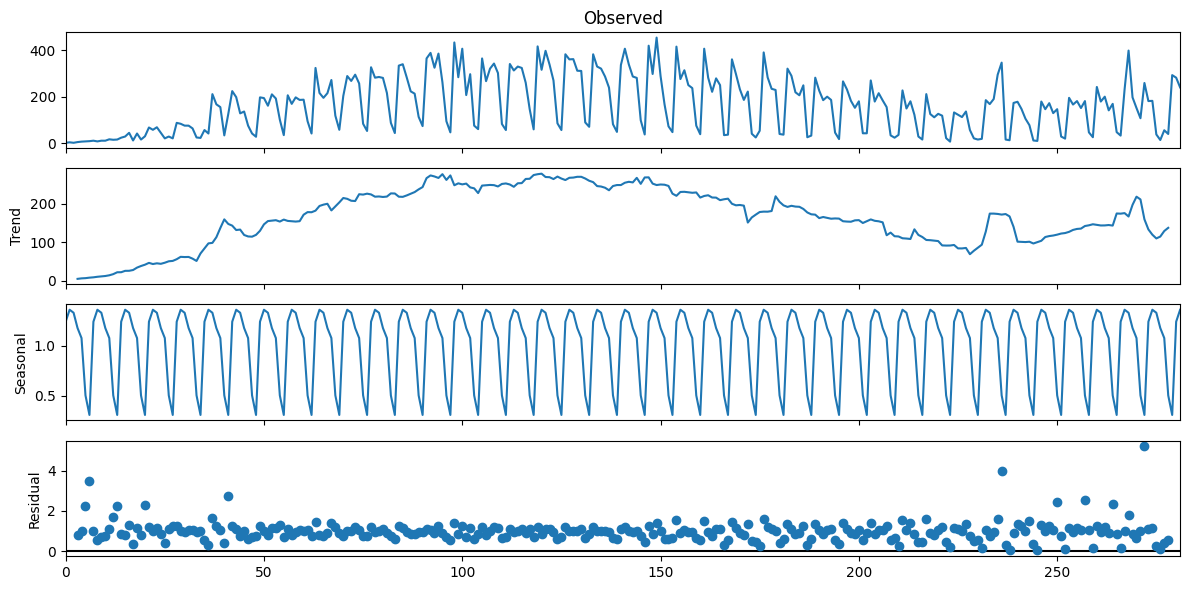

In [ ]:
# Para a decomposição em multiplicativa, precisa desconsiderar os valores < 0 ou nulos

mortes = mortes[mortes > 0]

# Decomposição multiplicativa
result_mul = seasonal_decompose(mortes, model='multiplicative', period=7)

# Plot da Decomposição
result_mul.plot()

# Plot do Gráfico
plt.show()

##  

## Séries Estacionárias e Não Estacionárias

Antes de falarmos sobre _Forecasting_ ou predição de séries temporais, um requisito essencial é que a série temporal seja __estacionária__. Vamos entender com o gráfico a seguir:

<img src="https://cdn-images-1.medium.com/max/1600/1*U2m5Eq7ScLnf2kG5mnQsKQ.png" width=800>

A diferença entre uma série temporal __estacionária__ e __não estacionária__ é que para as séries estacionárias, o valor de __média__ e __variância__ da série é __constante__ ao longo do tempo, diferente do caso das 'series não estacionárias.<br><br>

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=800>
<br>

Uma forma para sabermos de fato se a nossa série temporal condiz com a condição de ser estacionária, utilizaremos um teste de hipótese chamado de __Teste de Dickey-Fuller Aumentado__.

In [ ]:
from statsmodels.tsa.stattools import adfuller

O valor-p indica a probabilidade de se observar uma diferença tão grande ou maior do que a que foi observada sob a hipótese nula

In [ ]:
# Testando para os casos confirmados
y_conf = covid['confirmed'].values

# Teste de Dickey Fuller
result = adfuller(y_conf)
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Valores críticos: ")
for key, value in result[4].items():
  print('t%s: %.3f' % (key, value))

if result[1] <= 0.05:
  print('É estacionária!')
else:
  print('Não é estacionário!')

ADF Statistic: -1.5084120465794042
P-value: 0.5293459913531243
Valores críticos: 
t1%: -3.453
t5%: -2.871
t10%: -2.572
Não é estacionário!


In [ ]:
# Testando para os casos confirmados
y_mortes = covid['deaths'].values

# Teste de Dickey Fuller
result = adfuller(y_mortes)
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Valores críticos: ")
for key, value in result[4].items():
  print('t%s: %.3f' % (key, value))

if result[1] <= 0.05:
  print('É estacionária!')
else:
  print('Não é estacionário!')

ADF Statistic: -1.9454825098246742
P-value: 0.3109762747978737
Valores críticos: 
t1%: -3.453
t5%: -2.871
t10%: -2.572
Não é estacionário!


> $H_0:$ Não é estacionária
>
> $H_1:$ É estacionária

Nível de confiança = 95%

$\alpha = 5%$

Rejeitar a hipotése nula ($H_0$) caso:

$$Pvalue <= \alpha$$

In [ ]:
0.31 <= 0.05

False

##   

## Métricas Móveis

Podemos calcular algumas métricas em relação a uma janela de tempo em dias, meses e etc, de acordo com o período de tempo definido para a base de dados. Vamos calcular as métricas móveis utilizando a função `rolling`:

In [ ]:
# Verificando as séries de média e desvio-padrão móvel com janela de 15 dias

covid['Média Movel Mortes - 15 dias'] = covid['deaths'].rolling(window=15).mean()
covid['Desvio Padrão Móvel Mortes - 15 dias'] = covid['deaths'].rolling(window=15).std()
covid['Mediana Móvel Mortes - 15 dias'] = covid['deaths'].rolling(window=15).median()

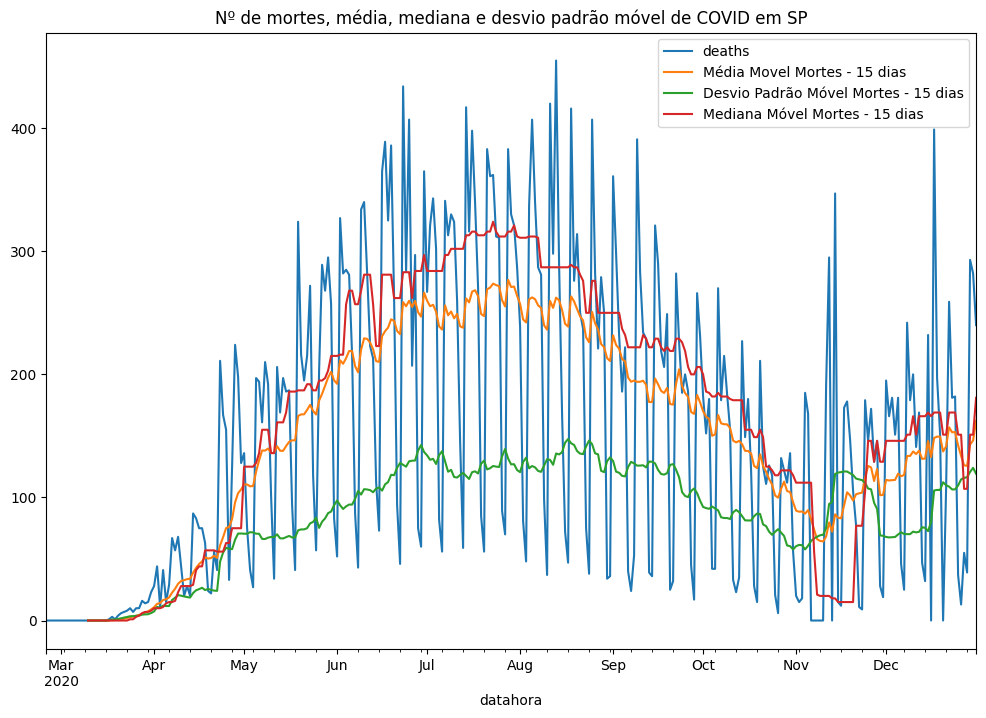

In [ ]:
# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 8]

# plot do gráfico

covid[['deaths', 'Média Movel Mortes - 15 dias', 'Desvio Padrão Móvel Mortes - 15 dias', 'Mediana Móvel Mortes - 15 dias']].plot()

# Mostra o titulo

plt.title('Nº de mortes, média, mediana e desvio padrão móvel de COVID em SP')

# Mostra o gráfico
plt.show()

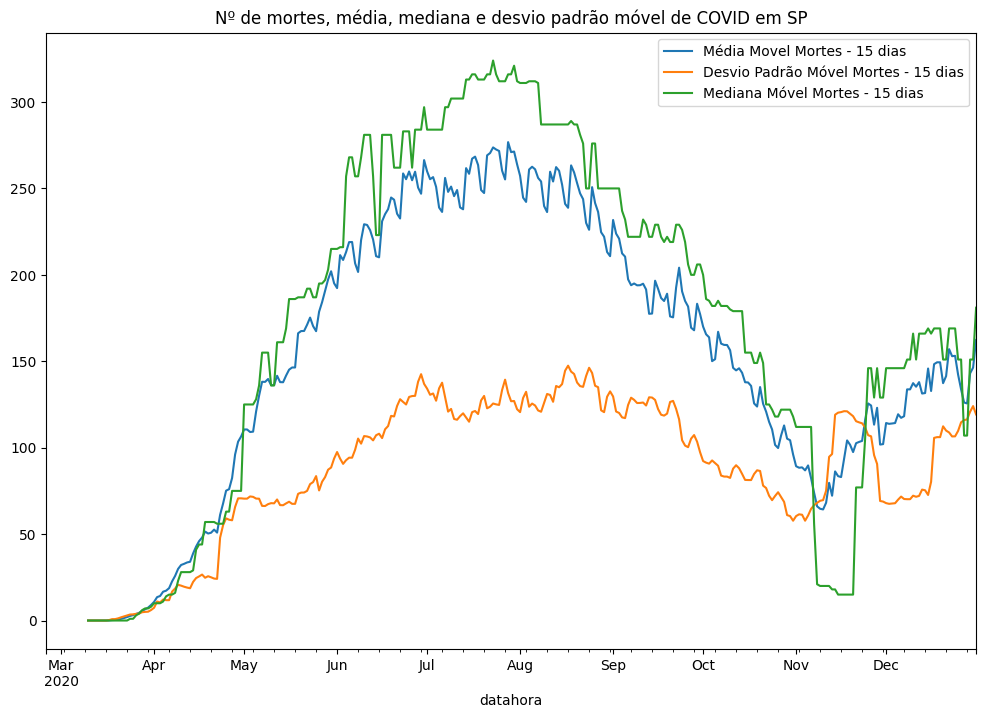

In [ ]:
# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 8]

# plot do gráfico

covid[['Média Movel Mortes - 15 dias', 'Desvio Padrão Móvel Mortes - 15 dias', 'Mediana Móvel Mortes - 15 dias']].plot()

# Mostra o titulo

plt.title('Nº de mortes, média, mediana e desvio padrão móvel de COVID em SP')

# Mostra o gráfico
plt.show()


Forecasting

https://towardsdatascience.com/time-series-forecast-in-python-using-sarimax-and-prophet-c970e6056b5b

https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6

##